In [1]:
import qctoolkit as qtk # https://github.com/SamKChang/qctoolkit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import glob
import os

plt.style.use('classic')

%matplotlib inline

missing file: bigdft
missing file: bigdft-tool
missing file: vasp
missing file: /home/samio/Works/PhD/packages/VASP/PP
please modify /path/to/qctoolkit/setting.py and recompile.


In [2]:
gaas = qtk.QMOut('gaas_ref/gaas_ref.out', program='abinit')
alas = qtk.QMOut('gaas_rst_test/gaas_rst_test.out', program='abinit')
opt_log = qtk.Logger('optimization/algaas_444.db')
entries = [e for e in opt_log.list(has_data=True) if e.data > 0]

def extract(i):
    out = None
    if i < len(entries):
        entry = entries[i]
        if 'processing' not in entry.comment:
            try:
                out_root = entry.comment.split("'")[1]
            except IndexError:
                out_root = entry.comment

            out_path = 'optimization/results/%s' % out_root

            if os.path.exists(out_path):
                out_file = glob.glob("%s/*.out" % out_path)[0]
                out = qtk.QMOut(out_file, program='abinit')
    return out

more than one o_EIG files found loading last file with name: gaas_ref/gaas_refo_DS2_EIG
occupation number not available... try to use molecule object with closed shell assumption
DB: loading existing database: optimization/algaas_444.db 


/home/samio/src/science/qctoolkit/qctoolkit/utilities/tools.py:87: RuntimeWarning: invalid value encountered in sqrt
  sc = np.sqrt(1-cc**2) # sin(gamma) = sqrt(1-cos(gamma)^2)


In [3]:
a = range(10)
sorted(a)[::-1]

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

occupation number not available... try to use molecule object with closed shell assumption
occupation number not available... try to use molecule object with closed shell assumption
occupation number not available... try to use molecule object with closed shell assumption
occupation number not available... try to use molecule object with closed shell assumption


(array([ 0.03880517,  0.03880517,  0.03880517, ...,  0.17121195,
         0.12441115,  0.17121195]),
 array([-12.2894012 , -12.24507384, -11.91391115, ...,   2.58530032,
          2.61691997,   2.61691997]),
 array([ 0.000305,  0.00248 ,  0.14807 , ...,  0.002574,  0.059796,
         0.079936]))

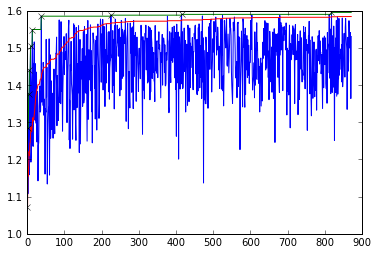

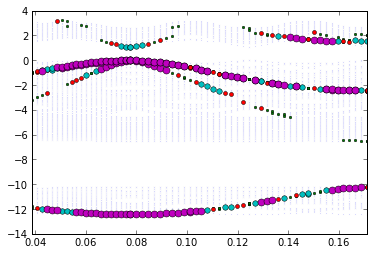

In [4]:
outs = []
for i in range(len(entries)):
    out = extract(i)
    if out:
        outs.append(out) 
        
Eg_list = [e.data for e in entries]

max_list = []
max_x = []
max_y = []
itr = 0
avg_list = []
for i in range(len(Eg_list)):
    Eg = Eg_list[i]
    if len(max_list) == 0 or Eg >= max(max_list):
        max_list.append(Eg)
        max_x.append(i)
        max_y.append(Eg)
    else:
        max_list.append(max_list[-1])
    if i > 0:
        limit = min(i, 20)
        avg_entries = np.array(sorted(Eg_list[:i])[::-1][:limit])
        avg_list.append(avg_entries.mean())
    else:
        avg_list.append(Eg)
        

plt.plot(Eg_list)
plt.plot(max_list)
plt.plot(avg_list)
plt.plot(max_x, max_y, ls='', marker='x', mec='k')
outs[0].plot_band_unfold([[0.5,0,0.25],[0,0,0],[0,0.5,0.5]], [4,4,4], zero_weight_color='0.99')

In [5]:
def stepPlot(ax, ticksize=None, labelsize=None, legendsize=None, search_color='b', avg_color='g'):
    ax.plot(Eg_list, marker ='x', ls=':', color=search_color, label='searched crystals', mec=search_color)
    ax.plot(max_list, color='k', lw=2)
    ax.step(max_x, max_y, where='post', 
             color='k', lw=2, marker='x', 
             markersize=10, mew=3, 
             label='best in population')
    ax.plot(avg_list, color=avg_color, lw=2, label='average of population')
    
    if labelsize:
        ax.set_xlabel('step', fontsize=labelsize)
        ax.set_ylabel(r'$E_g$ [eV]', fontsize=labelsize)
    else:
        ax.set_xlabel('step')
        ax.set_ylabel(r'$E_g$ [eV]')
    #ax.set_xticklabels(ax1.get_xticklabels(),fontsize=15)
    if ticksize:
        ax.set_xticklabels(range(0,len(entries),100),fontsize=ticksize)
        ax.set_yticklabels(np.arange(1, 1.7,0.1),fontsize=ticksize)
    else:
        ax.set_xticklabels(range(0,len(entries),100))
        ax.set_yticklabels(np.arange(1, 1.7,0.1))
        
    if legendsize:
        ax.legend(loc=4, fontsize=legendsize, numpoints=1)
    else:
        ax.legend(loc=4, numpoints=1)
    
    return ax

def bandPlot(ax, out, ticksize=None, labelsize=None, legendsize=None, zero_weight_color='k'):
    tick_pos = [0.031, 0.079, 0.173]
    tick_txt = [
        r'$\mathrm{L}$', r'$\Gamma$', r'$\mathrm{X}$'
    ]
    out.plot_band_unfold([[0.5,0,0.25],[0,0,0],[0,0.5,0.5]], [4,4,4], 
                         ax=ax, zero_weight_color=zero_weight_color)
    ax.set_xticks(tick_pos)
    if ticksize:
        ax.set_xticklabels(tick_txt, fontsize=ticksize)
        ax.set_yticklabels(np.arange(-14,5,2), fontsize=ticksize)
    else:
        ax.set_xticklabels(tick_txt)
        ax.set_yticklabels(np.arange(-14,5,2))
    if labelsize:
        ax.set_xlabel(r'wavevector $\mathbf{k}$', fontsize=labelsize)
        ax.set_ylabel(r'$E(\mathbf{k})$ [eV]', fontsize=labelsize)
    else:
        ax.set_xlabel(r'wavevector $\mathbf{k}$')
        ax.set_ylabel(r'$E(\mathbf{k})$ [eV]')
    
    return ax

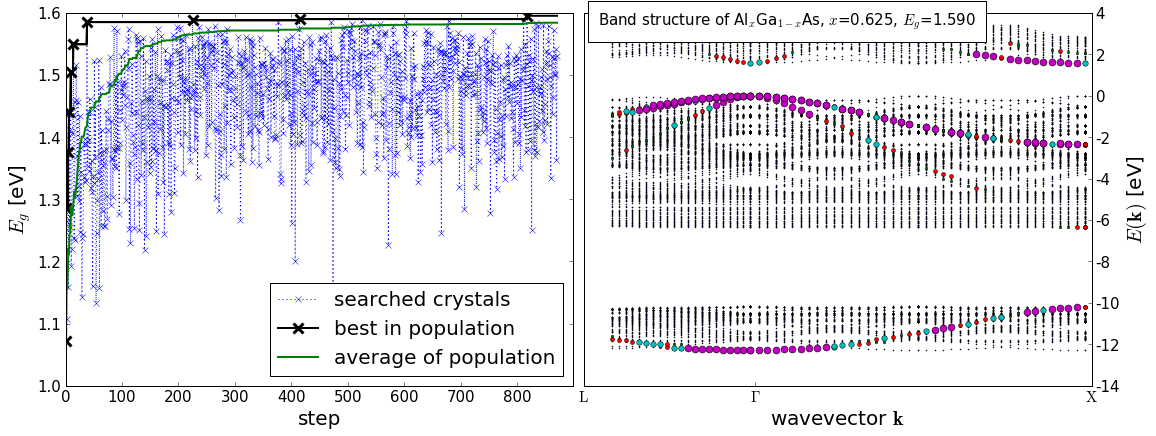

In [6]:
def version1():
    
    nAl = float(outs[-1].molecule.name.split('Ga')[0].replace('Al',''))
    ratio = "%5.3f" % (nAl / 64)
    Eg = "%5.3f" % outs[-1].Eg

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

    ax1 = stepPlot(ax1,ticksize=15, labelsize=20, legendsize=20)
    ax2 = bandPlot(ax2, outs[-1],ticksize=15, labelsize=20, legendsize=20)

    ax2.yaxis.set_label_position('right')
    ax2.yaxis.tick_right()
    ax2.text(0.035, 3.4, 
             r'Band structure of Al$_x$Ga$_{1-x}$As, $x$=%s, $E_g$=%s' % (ratio, Eg),
             bbox={'facecolor':'white', 'pad':10}, fontsize=15)
    
    plt.tight_layout(0.5)

version1()

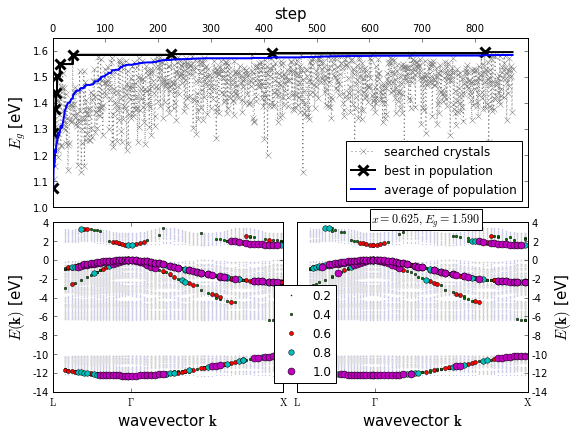

In [7]:
def version2():
    
    nAl = float(outs[-1].molecule.name.split('Ga')[0].replace('Al',''))
    ratio = "%5.3f" % (nAl / 64)
    Eg = "%5.3f" % outs[-1].Eg
    
    fig = plt.figure(figsize=(8,6))
    gs = gridspec.GridSpec(2,2)
    ax1 = fig.add_subplot(gs[0,:])
    ax2 = fig.add_subplot(gs[1,0])
    ax3 = fig.add_subplot(gs[1,1])
    
    weight = '0.9'
    
    stepPlot(ax1, labelsize=15, legendsize=12, search_color='0.5', avg_color='b')
    bandPlot(ax2, outs[-1], zero_weight_color=weight, labelsize=15, legendsize=12)
    bandPlot(ax3, outs[-2], zero_weight_color=weight, labelsize=15, legendsize=12)
    
    ax1.xaxis.set_label_position('top')
    ax1.xaxis.tick_top()
    ax1.set_ylim([1,1.65])
    
    ax3.yaxis.set_label_position('right')
    ax3.yaxis.tick_right()
    
    
    ax3.text(0.0767, 3.9, 
             r'$x=%s, E_g=%s$' % (ratio, Eg),
             bbox={
                 'facecolor':'white', 
                 #'edgecolor':'white',
                 'pad':1.2,
                 #'alpha':.9,
             },
             fontsize=12)
    
    w_list = np.arange(0,1.1,0.2)
    c_list = [weight, 'g', 'r', 'c', 'm']
    for i in range(len(w_list) - 1):
        ax3.plot([10],[0], ls='', marker='o',  
                 markersize=1.5*i + 1, 
                 color=c_list[i],
                 label='%3.1f' % w_list[i+1])
    ax3.legend(numpoints=1, loc=(-0.1,0.05), fontsize=12)
    
    plt.tight_layout(0.5)
    
version2()
plt.savefig('Eg_opt.pdf')